# Cvičení 4

Tématem tohoto cvičení jsou přímé řešiče soustav lineárních rovnic (LU, LDLT, LDMT, Choleského dekompozice) a jejich výpočetní náročnosti.

## Výpočetní náročnost přímých řešičů 

Připomeňme, kolik aritmetických operací přibližně vyžadují přímé řešiče:
- LU rozklad bez pivotizace: $\frac{2}{3}m^3$
- LDMT rozklad: $\frac{2}{3}m^3$
- LDLT rozklad: $\frac{1}{3}m^3$
- Choleského rozklad: $\frac{1}{2}m^3$
- dopředná a zpětná substituce: $\frac{1}{2}m^2$

V první části cvičení porovnáme výpočetní časy vybraných metod z NumPy a SciPy v závislosti na velikosti vstupní matice.

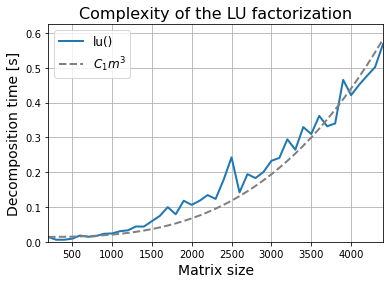

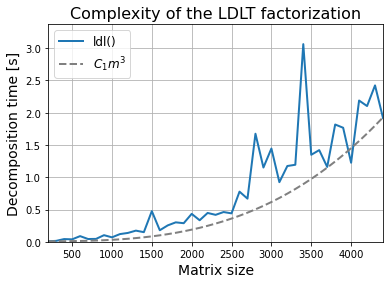

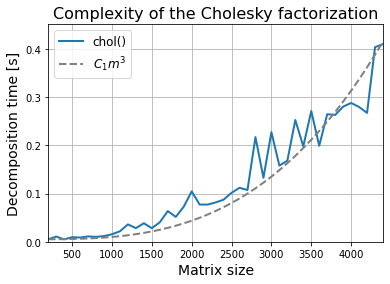

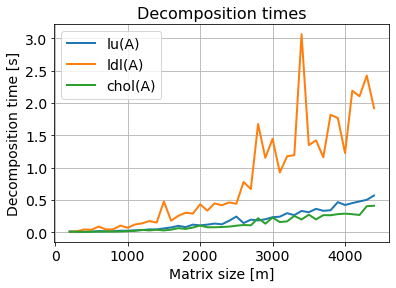

In [59]:
# Test vypocetnich narocnosti primych resicu

# Vygenerujeme vektor s rozmery matic
min_m = 200
max_m = 4400
step = 100
# Zjistete v napovede nebo pomoci Googlu, k cemu slouzi metoda range
mat_sizes = np.arange(min_m, max_m+step, step) 

# Predalokujeme si vektory, ve kterych budeme ukladat casy operaci
# Zjistete, k cemu slouzi metoda zeros_like. Proc zde musime explicitne specifikovat datovy typ?
t_lu = np.zeros_like(mat_sizes, dtype=np.float64)
t_ldl = np.zeros_like(mat_sizes, dtype=np.float64)
t_chol = np.zeros_like(mat_sizes, dtype=np.float64)

for i in range(len(mat_sizes)):
    # Vygenerujeme nahodnou symetrickou pozitivne definitni matici
    m = mat_sizes[i]
    A = np.random.rand(m, m)
    A = 0.5*(A + A.T)           # zajisti symetrii
    A = A + m * np.eye(m)       # zajisti diagonalni dominanci (pozitivni def.)

    # LU rozklad
    st = time.time()
    P, L1, U = scipy.linalg.lu(A)
    t_lu[i] = time.time() - st

    # LDLT rozklad
    st = time.time()
    L2, D, perm = scipy.linalg.ldl(A)
    t_ldl[i] = time.time() - st

    # Choleskeho rozklad
    st = time.time()
    R = scipy.linalg.cholesky(A)
    t_chol[i] = time.time() - st

# Vykreslime casy reseni v zavislosti na velikosti matice pro jednotlive resice
plot_result(mat_sizes, t_lu, 'lu()', 'LU')
plot_result(mat_sizes, t_ldl, 'ldl()', 'LDLT')
plot_result(mat_sizes, t_chol, 'chol()', 'Cholesky')

# Vykreslime casy LU, LDL a Choleskeho rozkladu do jednoho grafu
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(mat_sizes, t_lu, linewidth=2, label='lu(A)')

ax.plot(mat_sizes, t_ldl, linewidth=2, label='ldl(A)')

ax.plot(mat_sizes, t_chol, linewidth=2, label='chol(A)')

ax.set_title('Decomposition times', fontsize=16)
ax.set_xlabel('Matrix size [m]', fontsize=14)
ax.set_ylabel('Decomposition time [s]', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc='upper left', fontsize=14)
plt.show()